In [56]:
import random
from pathlib import Path

import matplotlib.pyplot as plt
import polars as pl
from PIL import Image

import src.visualization.image_utils as imutil
import src.visualization.plot as putil
from src.utilities import find_project_root

putil.set_mpl_styles(fontsize=10)

In [68]:
project_root = find_project_root()
feature_root = project_root / "reports/features"

cfg64_feature_path = feature_root / "SimpleCAE64/2023-07-21/20-18-22"
checkdata64 = pl.read_csv(
    cfg64_feature_path / "feature_check_data_clustering_VBGMM_iter1000.csv"
).select("cluster", "filepath")
traindata64 = pl.read_csv(
    cfg64_feature_path / "feature_train_data_clustering_VBGMM_iter1000.csv"
)

cfg32_feature_path = feature_root / "SimpleCAE32/2023-07-10/13-09-32"
checkdata32 = pl.read_csv(
    cfg32_feature_path / "feature_check_data_clustering.csv"
).select("cluster", "filepath")
traindata32 = pl.read_csv(
    cfg32_feature_path / "feature_train_data_clustering.csv"
)

cfg16_feature_path = feature_root / "SimpleCAE16/2025-02-04/08-12-21"
checkdata16 = pl.read_csv(cfg16_feature_path / "features_check_data_pca_with_clusters_2025-02-04-13-28-50.csv")
traindata16 = pl.read_csv(cfg16_feature_path / "features_train_data_pca_with_clusters_2025-02-04-13-28-50.csv")

dataset_dir = project_root / "data/processed/check/CNTForest"
dataset64 = dataset_dir / "cnt_sem_for_check_64x64/10k"
dataset32 = dataset_dir / "cnt_sem_for_check_32x32/10k"
dataset16 = dataset_dir / "cnt_sem_for_check_16x16/10k"

In [69]:
def hoge(
    df: pl.DataFrame, srcdir: Path, pastloc: imutil.PasteLocation
) -> dict[int, Image.Image]:
    paths_iterator = df.groupby(pl.col("cluster")).agg("filepath").iter_rows()
    results: dict[int, Image.Image] = {}
    c: int
    paths: list[str]
    for c, paths in paths_iterator:
        num_sample = min(pastloc.num_tile, len(paths))
        imgs = [
            Image.open(srcdir / p) for p in random.sample(paths, num_sample)
        ]
        results[c] = pastloc.concat_images(imgs)
    return results

In [70]:
imgs64 = hoge(
    checkdata64, dataset64, imutil.PasteLocation((64, 64), (4, 4), (2, 2))
)
imgs32 = hoge(
    checkdata32, dataset32, imutil.PasteLocation((32, 32), (4, 4), (2, 2))
)
imgs16 = hoge(
    checkdata16, dataset16, imutil.PasteLocation((16, 16), (4, 4), (2, 2))
)

In [44]:
len(imgs64)

10

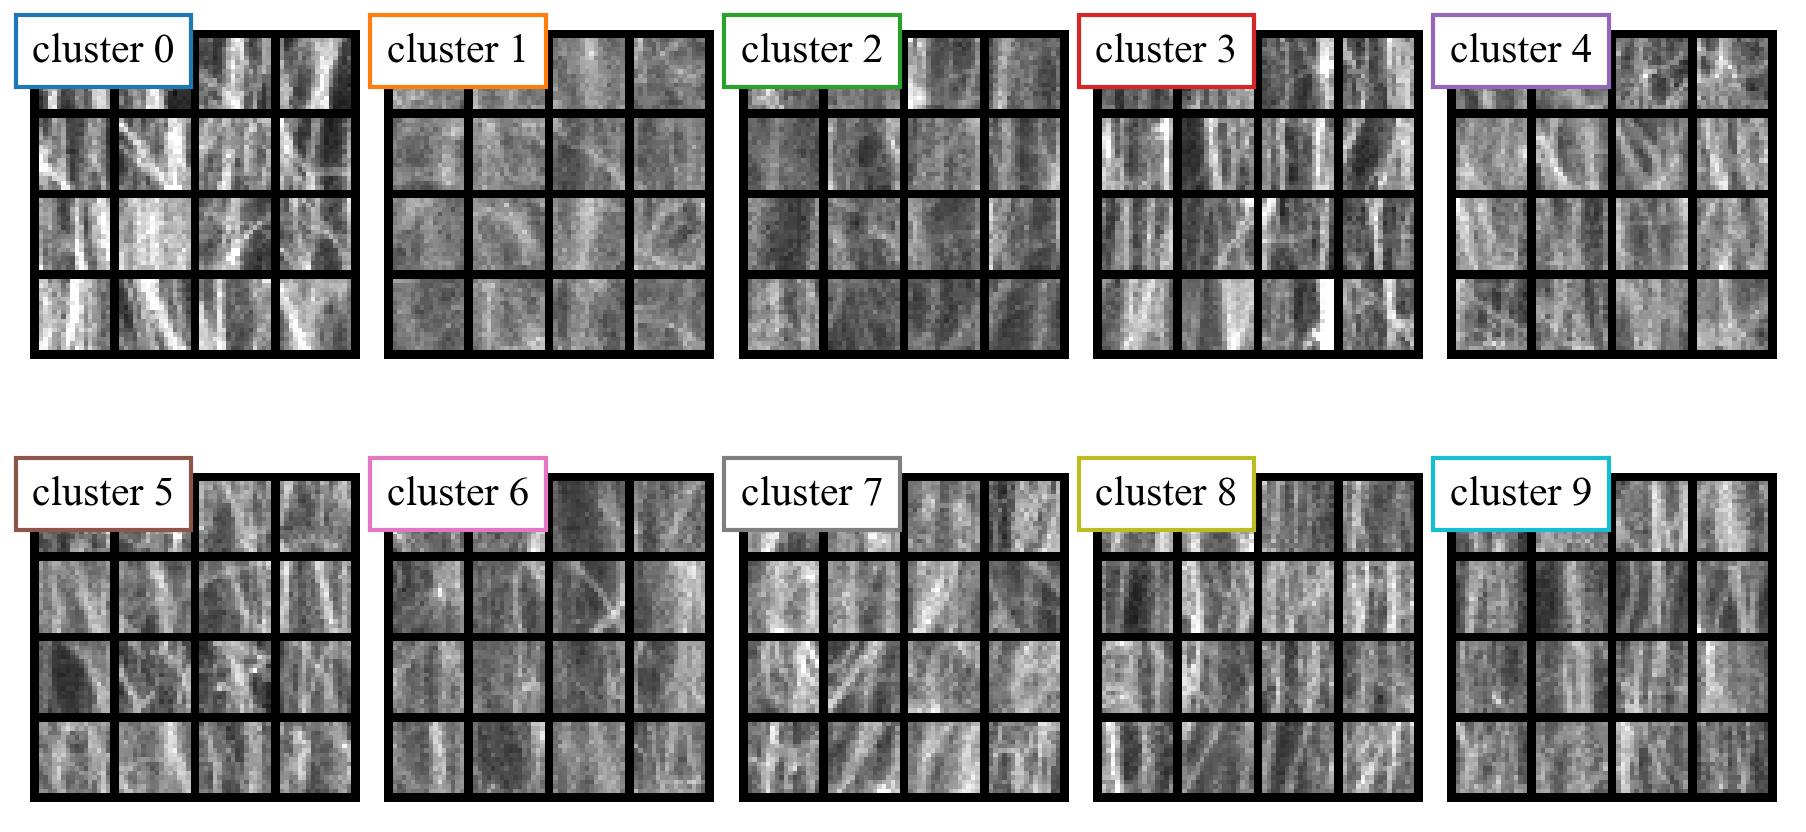

In [73]:
cmap = plt.get_cmap("tab10")
figsize = putil.cvt_unit((15, 7.5))
fig = plt.figure(figsize=figsize, layout="constrained", dpi=300)
for i, (c, img) in enumerate(imgs16.items(), 1):
    ax = fig.add_subplot(2, 5, i)
    ax.imshow(img, cmap="gray", vmin=0, vmax=255)
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.set_axis_off()
    color = cmap(i - 1)
    # ax.spines["top"].set_color(color)
    # ax.spines["right"].set_color(color)
    # ax.spines["bottom"].set_color(color)
    # ax.spines["left"].set_color(color)

    ax.text(
        0, 0, f"cluster {c}", ha="left", va="top", bbox={"facecolor": "white", "edgecolor": color},
    )

In [74]:
dst_dir = Path(
    "/home/shinsei/MyResearches/feat_extrc/reports/figures/SimpleCAE16/thesis-ch3"
)
fig.savefig(
    dst_dir / "each_cluster_images/cluster_images/imsize16_clusters.svg",
)


In [35]:
dst_dir = Path(
    "/home/shinsei/MyResearches/feat_extrc/reports/figures/SimpleCAE16/thesis-ch3"
)
imutil.save_cated_images(
    cat_imgs64,
    dst_dir / "each_cluster_images/64x64",
    fname_format="cluster_{t}_sample_{d}.jpg",
)